In [3]:
import pandas as pd

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')


### 전처리

In [2]:
df_train.columns
df_test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
#파일 전체 관련
#df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Numerical Values

In [12]:
#Pclass

df_train['Pclass'].value_counts().sort_index()
# df_train['Pclass'].value_counts().sort_index(ascending = False) ::::3,2,1 순으로 출력

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [13]:
df_train['SibSp'].value_counts().sort_index()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

In [14]:
df_train['Parch'].value_counts().sort_index()


Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

In [21]:
df_train['Fare']

#숙제 : fare을 그룹 10개 나눠서 value_counts 해보기
# 1. count를 even하게 10개의 그룹으로 나눠서 (891개니까 roughly_90) - Fare_group_1에 저장
#2. 값을 기준으로 5개의 그룹으로 나눠서 Fare_group_2에 저장 (0~10 / 10~20 / 20~30 / 30~40 / 40~)


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [15]:
#df_train.dropna(subset=['Age'])
#df_train.dropna(subset=['any']) ;;; column마다 하나라도 nan이 있으면 삭제

#df_train.fillna(0).head(6)
#df_train['Age'] = df_train['Age'].fillna(0)
#df_train.head(6)
df_train['Age'].fillna(df_train['Age'].mean()).head(10)



0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [ ]:
#for 함수와 apply 함수 비교
#시간 / 효율성 차이


In [19]:

#숙제 : fare을 그룹 10개 나눠서 value_counts 해보기
# 1. count를 even하게 10개의 그룹으로 나눠서 (891개니까 roughly_90) - Fare_group_1에 저장
#2. 값을 기준으로 5개의 그룹으로 나눠서 Fare_group_2에 저장 (0~10 / 10~20 / 20~30 / 30~40 / 40~)
'''df_train['Fare']

df_train['Fare_group_1'] = pd.qcut(df_train['Fare'], 10, labels=False)
Fare_group_1 = df_train['Fare_Group_1'].value_counts().sort_index()
print(Fare_group_1)

df_train['Fare_Group_2'] = pd.cut(df_train['Fare'], [0, 10, 20, 30, 40, 100000])
Fare_Group_2 = df_train['Fare_Group_2'].value_counts().sort_index()
print(Fare_Group_2)'''

df_train['Fare_group_1'] = pd.qcut(df_train['Fare'], q=[i / 10 for i in range(0, 11)], labels = [i for i in range(0,10)])
                                
df_train['Fare_group_2'] = pd.cut(df_train['Fare'], bins=[0, 10, 20, 30, 40, 10000], labels = [1,2,3,4,5])

### Categorical Data

In [31]:
df_train[df_train['Name'].str.contains(r'Dr. ')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group_1,Fare_group_2
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,9,5
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,4,2
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,3,2
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,7,4
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,9,5
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,7,4
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,6,3


In [5]:
df_train['Sex'].value_counts()
pd.get_dummies(df_train['Sex'])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_train[['Sex']])
pd.DataFrame(encoded, columns=encoder.get_feature_names_out())


,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [6]:
#Ticket

df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [9]:
#Cabin

#df_train['Cabin']
cabin_only = df_train[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)
cabin_only["Deck"] = cabin_only["Cabin"].str[:1]
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)",expand = False).astype("float")
cabin_only[cabin_only["Cabin_Data"]]

,Cabin,Cabin_Data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
...,...,...,...,...
871,D35,True,D,35.0
872,B51 B53 B55,True,B,51.0
879,C50,True,C,50.0
887,B42,True,B,42.0


In [10]:
df_train['Embarked']
pd.get_dummies(df_train['Embarked'], prefix = 'Embarked')


,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


Text(0.5, 1.0, 'Total # of People by Survival Status')

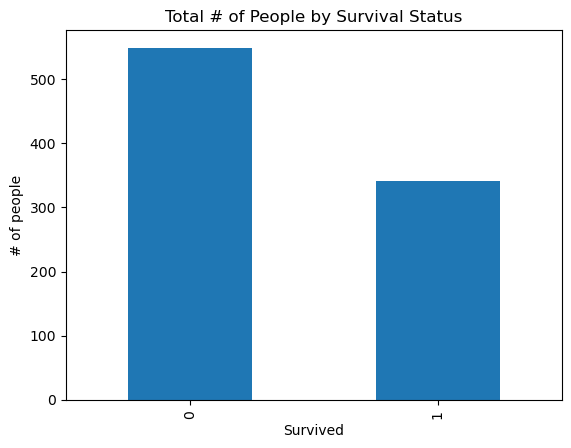

In [13]:
import matplotlib.pyplot as plt

plot = df_train['Survived'].value_counts().plot(kind='bar')
plot.set_xlabel('Survived')
plot.set_ylabel('# of people')
plot.set_title('Total # of People by Survival Status')

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


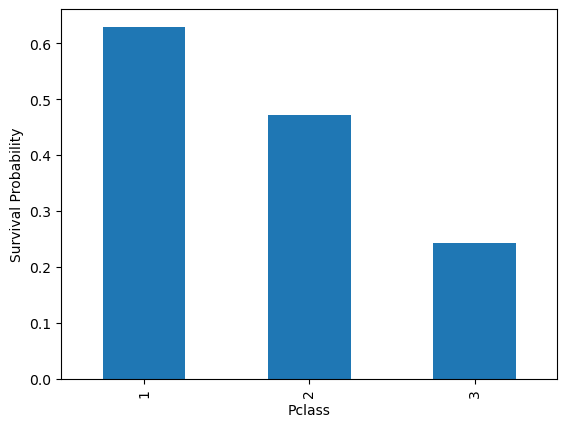

In [15]:
plot = df_train[['Pclass','Survived']].groupby('Pclass').mean()['Survived'].plot(kind='bar')
plot.set_xlabel('Pclass')
plot.set_ylabel('Survival Probability')

df_train[['Pclass', 'Survived']].groupby('Pclass')['Survived'].describe()

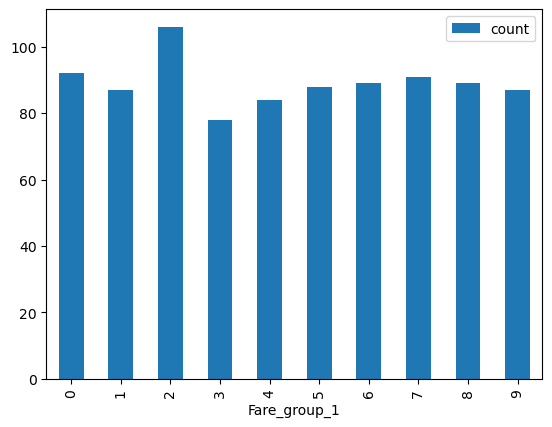

In [20]:
plot = df_train['Fare_group_1'].value_counts().sort_index().plot(kind='bar')
plot.legend()

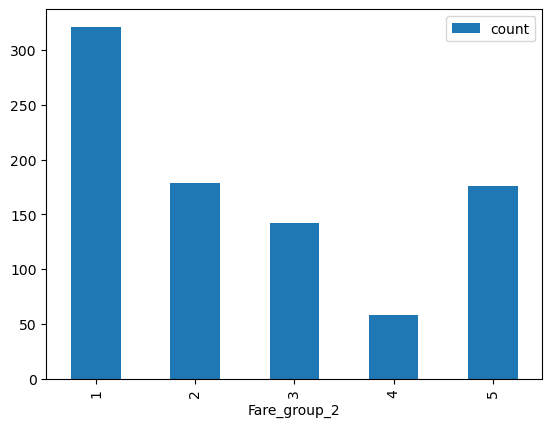

In [21]:
plot = df_train['Fare_group_2'].value_counts().sort_index().plot(kind='bar')
plot.legend()

In [22]:
df_train.corr(numeric_only=True)
#fare,Pclass --> -0.549500

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
## 숙제
'''
1. Pclass vs Fare
- 하나의 subplot마다 pclass 하나
- Fare은 scale of 10 (10씩 그룹지어서 그래프 생성)

2. Pclass vs Age
- 하나의 subplot마다 pclass 하나
'''

1. logistic Regression 뭔지 배워오기
로지스틱 회귀분석(Logistic Regression) 이란 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 
그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해 주는 지도 학습 알고리즘.
1개 이상의 독립변수가 있을 때 이를 이용하여 데이터가 2개의 범주 중 하나에 속하도록 결정하는 이진 분류
문제를 풀 때 로지스틱 회귀분석을 많이 사용.


2. k-nearest neighbor 뭔지 배워오기
최근접 이웃
새로운 데이터가 들어왔을 때 K개의 가장 가까이 있는 데이터들과 비교하여 예측하고 분류하는 알고리즘
K 값은 이웃의 수
유클리드 거리 : 피타고라스?

'#KNN 알고리즘 함수 https://smecsm.tistory.com/53
def KNearestNeighbor(train, target, test, k):
    size = len(test)
    class_result = []
    for i in range(0,size) :
        # 유클리디안 거리
        df = train - test.loc[i] #원래의 데이터와 판단하고자 하는 test데이터들 간의 차
        df = df**2 #데이터의 제곱
        train['Distance'] = np.sqrt(df.sum(axis=1))#데이터들의 합의 제곱근 = 거리
        
        train['Survived'] = target
        train = train.sort_values(by='Distance', kind='mergesort') #거리 중 가까운 순서대로 정렬
        train_head = train['Survived'].head(k) #정렬된 거리 중 본인이 선택한 k개만큼 추출
        class_result.append(train_head.value_counts().index[0]) #그 중 가장 많은 결과를 도출
    test['Survived'] = class_result
    
    return test'


3. decision tree 뭔지 배워오기
분류와 회귀 모두 가능한 모델
스무고개 하듯이 질문을 통해 분류
첫 질문 : root node 
마지막 질문 : terminal node 



Text(0, 0.5, 'Frequency')

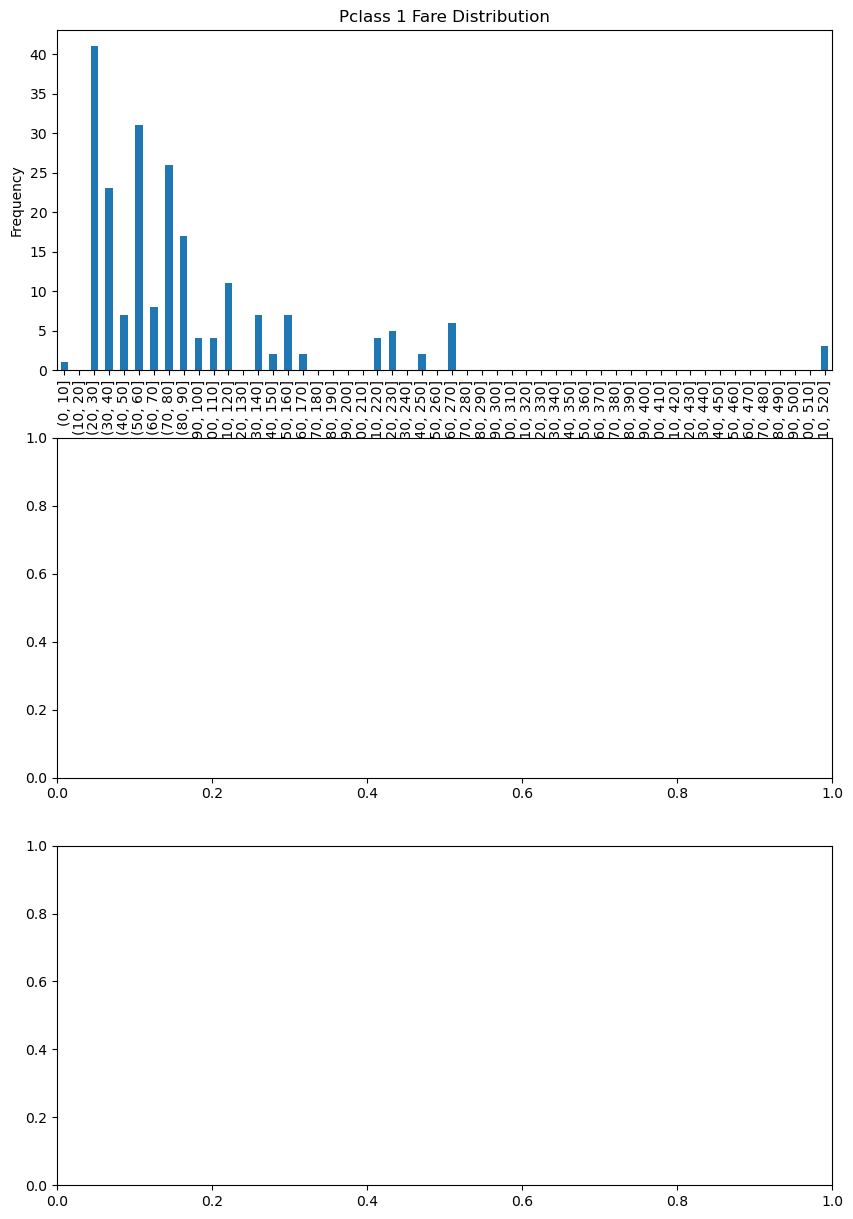

In [5]:
'''
1. Pclass vs Fare
- 하나의 subplot마다 pclass 하나
- Fare은 scale of 10 (10씩 그룹지어서 그래프 생성)
'''

import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10,15))
bins = [i * 10 for i in range(int(max(df_train['Fare'] // 10)) + 2)]
# P class 1
pd.cut(df_train[df_train['Pclass'] == 1]['Fare'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Pclass 1 Fare Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 1]['Fare'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[0].set_title('Pclass 1 Fare Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 1]['Fare'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[0].set_title('Pclass 1 Fare Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')




Text(0, 0.5, 'Frequency')

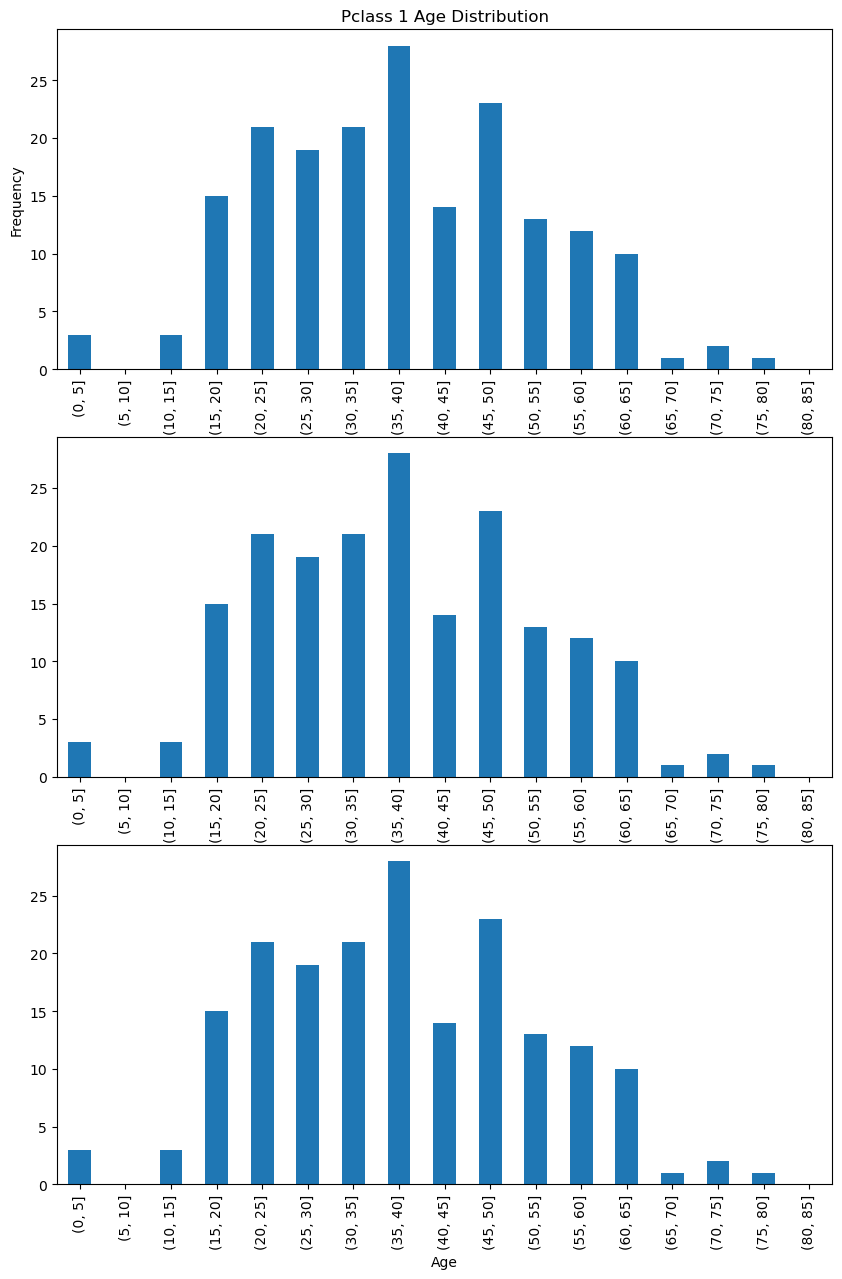

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10,15))
bins = [i * 5 for i in range(int(max(df_train['Age'] // 5)) + 2)]
# P class 1
pd.cut(df_train[df_train['Pclass'] == 1]['Age'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Pclass 1 Age Distribution')
axes[0].set_xlabel('Age Bins')
axes[0].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 1]['Age'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[0].set_title('Pclass 1 Age Distribution')
axes[0].set_xlabel('Age Bins')
axes[0].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 1]['Age'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[0].set_title('Pclass 1 Age Distribution')
axes[0].set_xlabel('Age Bins')
axes[0].set_ylabel('Frequency')

# 머신러닝

In [ ]:

training data를 사용해서 모델 parameter을 결정 (파이썬이 알아서) - model fit
해당 parameter을 가진 모델을 test 데이터로 확인

중요한것
training data를 어떤걸 사용해야되나
x 값 - independent variable
y 값 - dependent variable

scaling
- minmaxscaling
- standardscaling

질문
0. scaling을 왜하냐  --> scale이 다르면 모델의 feataure importance에 bias가 생김
   모델 정확도에 안 좋은 영향을 끼친다 (scaling이 없으면)

1. training data랑 testing data를 같이 한 번에 scaling을 해야되냐 
> 따로따로 scaling

2. testing data에 결과가 없는 경우가 많다
> cross - validation 을 통해 체크


In [14]:
x_train, y_train = df_train[['Pclass','Age','Fare','Sex','SibSp','Parch']].copy(), df_train[['Survived']].copy()
x_test, y_test = df_test[['Pclass','Age','Fare','Sex','SibSp','Parch']].copy(), pd.read_csv('gender_submission.csv', usecols=['Survived'])


## Columns to use

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Pclass - Use Apply
x_train['Pclass'] = x_train[['Pclass']].apply(lambda x: (x - 1)  / (max(x) - min(x)))
x_test['Pclass'] = x_test[['Pclass']].apply(lambda x: (x - 1) / (max(x) - min(x)))

# Age - Use Apply
scaler = MinMaxScaler()

x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_test['Age'] = scaler.fit_transform(x_test[['Age']])

# Sex
encoder = OneHotEncoder(sparse_output=False)
x_train[['Sex_Female', 'Sex_Male']] = encoder.fit_transform(x_train[['Sex']])
x_test[['Sex_Female', 'Sex_Male']] = encoder.fit_transform(x_test[['Sex']])

# Fare
# Make it look like it is normal distribution by taking log
# Then Use StandardScaler
import math
x_train['Fare'] = x_train['Fare'].fillna(0).apply(lambda x: math.log10(x+0.001))
x_test['Fare'] = x_test['Fare'].fillna(0).apply(lambda x: math.log10(x+0.001))

std_scaler = StandardScaler()

x_train['Fare'] = std_scaler.fit_transform(x_train[['Fare']])
x_test['Fare'] = std_scaler.fit_transform(x_test[['Fare']])

# Make a new column named Family_Exist by adding SibSp and Parch
x_train['Family_Exist'] = x_train['SibSp'] + x_train['Parch']
x_test['Family_Exist'] = x_test['SibSp'] + x_test['Parch']
x_train['Family_Exist'] = x_train['Family_Exist'].apply(lambda x: 0 if x == 0 else 1)
x_test['Family_Exist'] = x_test['Family_Exist'].apply(lambda x: 0 if x == 0 else 1)

# Finalize the necessary columns
x_train = x_train[['Pclass', 'Age', 'Sex_Female', 'Sex_Male', 'Fare', 'Family_Exist']].copy()
x_test = x_test[['Pclass', 'Age', 'Sex_Female', 'Sex_Male', 'Fare', 'Family_Exist']].copy()

In [15]:
x_train

,Pclass,Age,Sex_Female,Sex_Male,Fare,Family_Exist
0,1.0,0.271174,0.0,1.0,-0.507051,1
1,0.0,0.472229,1.0,0.0,0.947944,1
2,1.0,0.321438,1.0,0.0,-0.450387,0
3,0.0,0.434531,1.0,0.0,0.760475,1
4,1.0,0.434531,0.0,1.0,-0.440426,0
...,...,...,...,...,...,...
886,0.5,0.334004,0.0,1.0,-0.135343,0
887,0.0,0.233476,1.0,0.0,0.396993,0
888,1.0,0.367921,1.0,0.0,0.240185,1
889,0.0,0.321438,0.0,1.0,0.396993,0


In [16]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_test['Survived_Prediction_logistic'] = logistic.predict(x_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_pred=y_test[['Survived_Prediction_logistic']], y_true = y_test[['Survived']])
confusion_matrix

/opt/anaconda3/envs/cmm/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[258,   8],
       [  6, 146]])

/opt/anaconda3/envs/cmm/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[Text(0.4942665233013937, 0.98, 'x[2] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.17162320339721254, 0.94, 'x[1] <= 0.076\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.3329448633493031, 0.96, 'True  '),
 Text(0.013937282229965157, 0.9, 'x[0] <= 0.75\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.006968641114982578, 0.86, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.020905923344947737, 0.86, 'x[4] <= 0.165\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.013937282229965157, 0.82, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.027874564459930314, 0.82, 'x[4] <= 0.425\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.020905923344947737, 0.78, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.03484320557491289, 0.78, 'x[4] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.027874564459930314, 0.74, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.041811846689895474, 0.74, 'gini = 0.0\nsamples = 3\nvalue = [

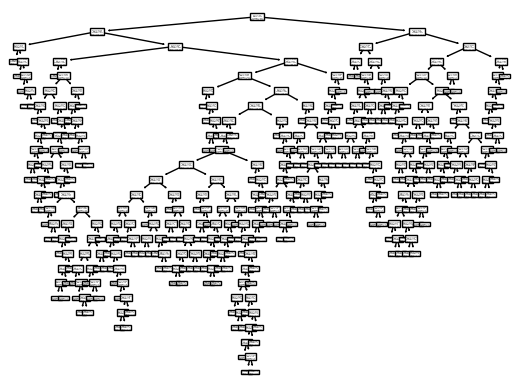

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_test['Survived_prediction_knn']=knn.predict(x_test)
from sklearn import metrics
confusion_matirx = metrics.confusion_matrix(y_pred=y_test[['Survived_prediction_knn']], y_true=y_test[['Survived']])
confusion_matirx


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_test['Survived_Prediction_tree'] = clf.predict(x_test)

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test[['Survived_Prediction_tree']], y_test[['Survived']])
confusion_matrix

tree.plot_tree(clf)